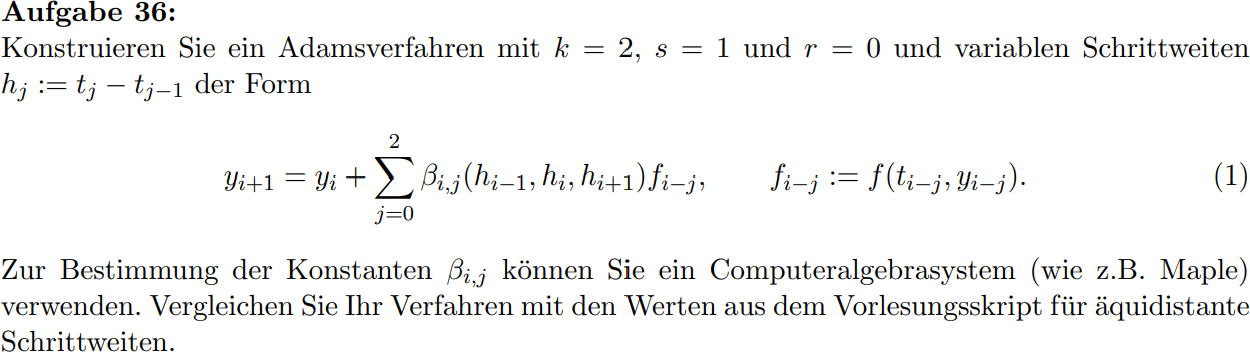

In [1]:
import numpy as np
import sympy as sp

In [2]:
# Allocate some symbols.

u = sp.Symbol('u')

h = sp.IndexedBase('h')
f = sp.IndexedBase('f')
ell = sp.Symbol('ell')

h_const = sp.Symbol('h')

beta = sp.IndexedBase('beta')

In [3]:
# Implement the Lagrange Polynomials

L_0 = lambda u: (u + h[ell]) / h[ell] * (u + h[ell] + h[ell-1]) / (h[ell] + h[ell-1])
L_1 = lambda u: -u / h[ell] * (u + h[ell] + h[ell-1]) / h[ell-1]
L_2 = lambda u: u / (h[ell] + h[ell-1]) * (u + h[ell]) / h[ell-1]

L = [L_0, L_1, L_2]

# Check for typos.
for L_ in L:
    display(L_(u))

(u + h[ell])*(u + h[ell - 1] + h[ell])/((h[ell - 1] + h[ell])*h[ell])

-u*(u + h[ell - 1] + h[ell])/(h[ell - 1]*h[ell])

u*(u + h[ell])/((h[ell - 1] + h[ell])*h[ell - 1])

In [4]:
# Calculate the weights (for arbitrary step sizes)

beta_ell = []

for j in range(3):

    beta_ell_j = sp.integrate(L[j](u), (u, 0, h[ell+1]))
    beta_ell_j = sp.factor(beta_ell_j)
    beta_ell += [beta_ell_j]
    
    eq = sp.Eq(beta[ell, j], beta_ell[j])
    display(eq)

beta_ell = sp.Matrix(beta_ell)

Eq(beta[ell, 0], (2*h[ell + 1]**2 + 3*h[ell + 1]*h[ell - 1] + 6*h[ell + 1]*h[ell] + 6*h[ell - 1]*h[ell] + 6*h[ell]**2)*h[ell + 1]/(6*(h[ell - 1] + h[ell])*h[ell]))

Eq(beta[ell, 1], -(2*h[ell + 1] + 3*h[ell - 1] + 3*h[ell])*h[ell + 1]**2/(6*h[ell - 1]*h[ell]))

Eq(beta[ell, 2], (2*h[ell + 1] + 3*h[ell])*h[ell + 1]**2/(6*(h[ell - 1] + h[ell])*h[ell - 1]))

In [5]:
# Let's substitute (for a constant step size)

weights = beta_ell.subs(h[ell-1], h).subs(h[ell], h).subs(h[ell+1], h)
nodes   = sp.Matrix([f[ell-j] for j in range(3)])

result = weights.transpose() @ nodes
result = sp.simplify(result[0])

display(result)

(-16*f[ell - 1] + 5*f[ell - 2] + 23*f[ell])*h/12

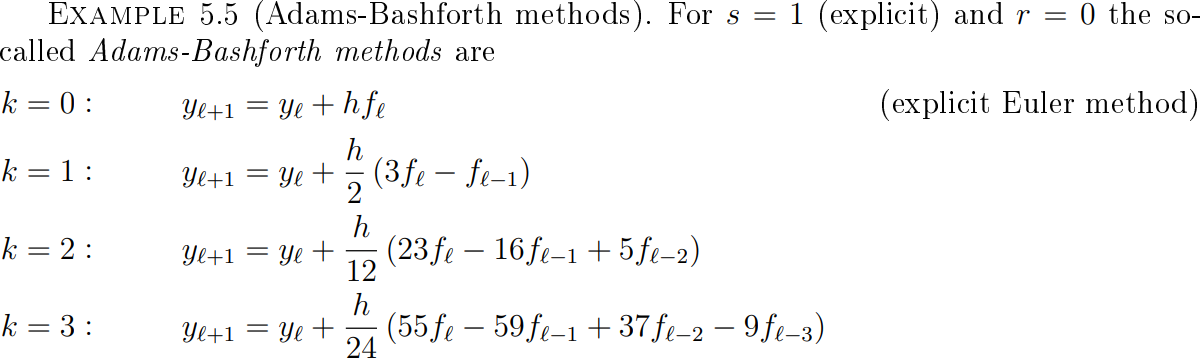